# Exploratory Data Analysis

In [84]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [86]:
# Load the data
df = pd.read_csv('data/declarations-exterminations-punaises-de-lit-2.csv')
#df['date'] = pd.to_datetime(df['date'])
#df

df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])

# Create difference between Declaration and Inspection
df['DATE_DIFF'] = round((df['DATE_DECLARATION'] - df['DATE_PRIOR_INSP'])/np.timedelta64(1,'D'))

# Create a column extracting month
df['DEC_MONTH'] = pd.DatetimeIndex(df['DATE_DECLARATION']).month

#Concatenate the values
#df['COORD_ADD'] = str(df['MTM8_X']) + '_' + str(df['MTM8_Y'])
#print(df['COORD_ADD'])
#print(str(df['LONGITUDE']) + '_' + str(df['LATITUDE']))
#print(df.shape)

print('Bed Bugs')
print(df.columns)
print(df.head())
print(df.describe())


print(df['BORO_NAME'].value_counts())
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

print('Corr:',df.corr())


Bed Bugs
Index(['NO_DECLARATION ', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ',
       'DATE_FIRST_EXT', 'DATE_LAST_EXT', 'HOOD_NUM', 'HOOD_NAME', 'BORO_NAME',
       'MTM8_X', 'MTM8_Y', 'LONGITUDE', 'LATITUDE', 'DATE_DIFF', 'DEC_MONTH'],
      dtype='object')
   NO_DECLARATION     DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ  \
0             4254 2012-10-28 16:36:04      2012-09-21      1.00   
1              830 2011-09-16 09:45:58      2011-07-13      1.00   
2             1380 2011-11-08 14:01:04      2011-11-02      1.00   
3              455 2011-08-10 09:53:47      2011-08-09      1.00   
4             1243 2011-10-26 10:11:32      2011-09-16      1.00   

  DATE_FIRST_EXT DATE_LAST_EXT HOOD_NUM      HOOD_NAME  \
0     2012-09-21    2012-09-21       24     Beaurivage   
1     2011-07-27    2011-08-17       50    Saint-Henri   
2     2011-11-07    2011-11-21       30   Sainte-Marie   
3     2011-08-09    2011-08-09       44  Upper Lachine   
4     2011-10-05    2011-10-05    

## Data Perspective
- One variable
    - Numeric variables
        - continuous: average income
        - discrete: population
    - Categorical variables
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## One Variable (numeric)

count   33357.00
mean       38.00
std        79.00
min      -347.00
25%         6.00
50%        16.00
75%        40.00
max      3738.00
Name: DATE_DIFF, dtype: float64


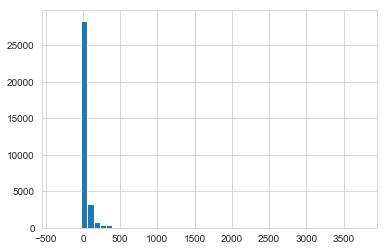

In [65]:
# Analize pricing distribution

# Histogram
print(df['DATE_DIFF'].describe().round())
plt.hist(df['DATE_DIFF'], bins=50)
plt.show()
# Box plot
#plt.boxplot(df['EXT_FREQ'])
#plt.xticks([1], ['EXT_FREQ'], rotation='horizontal')
#plt.show()

In [ ]:
#TODO: Analyze all the numerical variables

## One Variable (categorical)

Rosemont–La Petite-Patrie               4320
Villeray–Saint-Michel–Parc-Extension    4304
Mercier–Hochelaga-Maisonneuve           4036
Le Plateau-Mont-Royal                   3696
Ville-Marie                             3347
Côte-des-Neiges–Notre-Dame-de-Grâce     2909
Ahuntsic-Cartierville                   2695
Montréal-Nord                           1754
Le Sud-Ouest                            1251
Saint-Laurent                           1116
Name: BORO_NAME, dtype: int64


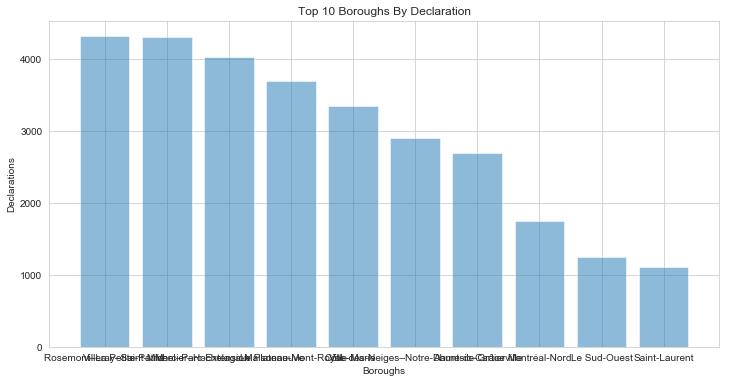

In [87]:
# Analize zipcode distribution
#print(df['BORO_NAME'].value_counts())
print(df['BORO_NAME'].value_counts().head(10))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')
plt.xlabel('Boroughs')
plt.ylabel('Declarations')

#labels = df['BORO_NAME'].value_counts().index
#values = df['BORO_NAME'].value_counts().values

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values


y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

In [ ]:
#TODO: Analyze all the categorical variables

Sainte-Marie      1730
Crémazie          1205
Parc-Extension    1171
Maisonneuve       1150
Lorimier           964
Vieux-Rosemont     938
Est                866
Père-Marquette     800
Cartierville       793
Montagne           792
Name: HOOD_NAME, dtype: int64


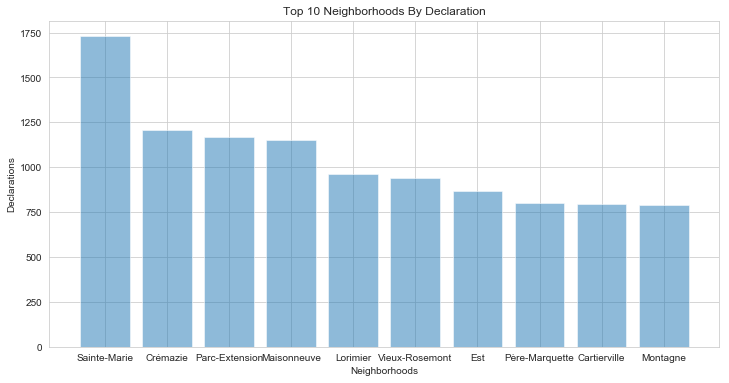

In [88]:
# Analyze Neighborhood distribution
print(df['HOOD_NAME'].value_counts().head(10))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')
plt.xlabel('Neighborhoods')
plt.ylabel('Declarations')

#labels = df['BORO_NAME'].value_counts().index
#values = df['BORO_NAME'].value_counts().values

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values


y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

10    4022
9     3671
11    3379
7     3217
8     3202
12    2703
6     2552
2     2264
3     2186
5     2069
4     2069
1     2031
Name: DEC_MONTH, dtype: int64


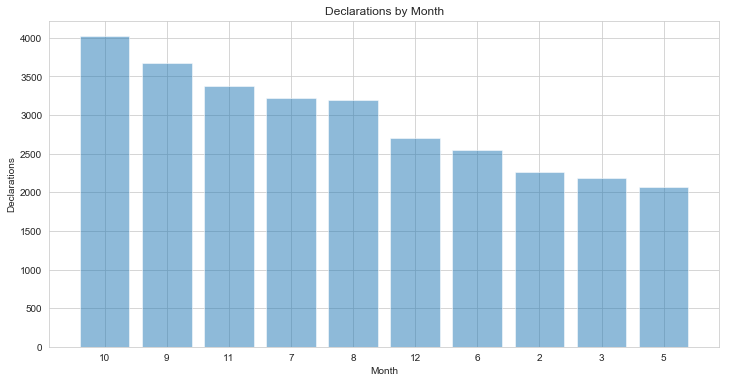

In [89]:
# Analyze Months distribution from declaration
print(df['DEC_MONTH'].value_counts().head(12))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by Month')
plt.xlabel('Month')
plt.ylabel('Declarations')

#labels = df['BORO_NAME'].value_counts().index
#values = df['BORO_NAME'].value_counts().values

labels = df['DEC_MONTH'].value_counts().head(10).index
values = df['DEC_MONTH'].value_counts().head(10).values


y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

## Multiple variables (Numeric x Numeric)

In [90]:
# Correlation
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DATE_DIFF,DEC_MONTH
NO_DECLARATION,1.00,-0.05,-0.05,-0.00,-0.05,-0.00,0.11,0.08
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.02,-0.05
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,-0.07,-0.00
MTM8_Y,-0.00,0.01,0.22,1.00,0.22,1.00,0.01,0.02
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,-0.07,-0.00
LATITUDE,-0.00,0.01,0.22,1.00,0.22,1.00,0.01,0.02
DATE_DIFF,0.11,-0.02,-0.07,0.01,-0.07,0.01,1.00,0.05
DEC_MONTH,0.08,-0.05,-0.00,0.02,-0.00,0.02,0.05,1.00


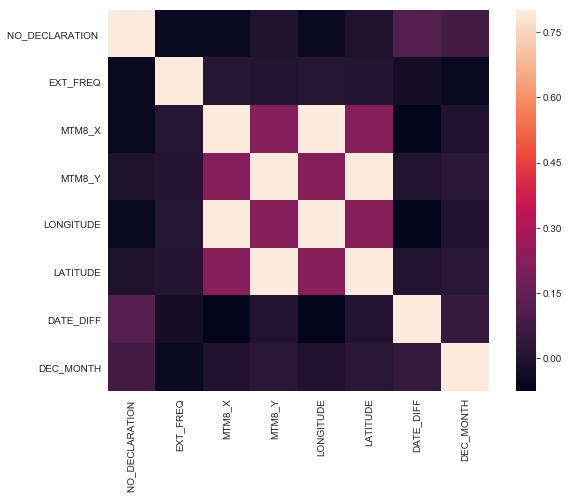

In [91]:
# heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

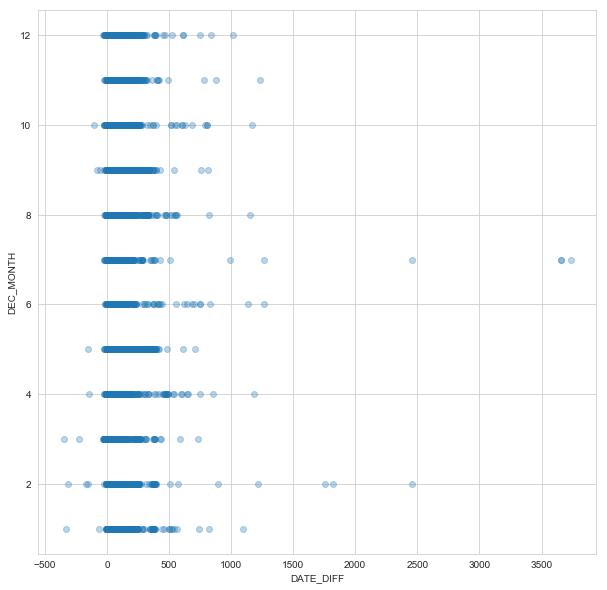

In [69]:
# Visualization : correlation between Price x SQFT

#plt.figure(figsize=(10,10))
#plt.xlabel('DATE_DIFF')
#plt.ylabel('DEC_MONTH')

#plt.plot(df['DATE_DIFF'], df['DEC_MONTH'], 'o', alpha=0.3)
#plt.show()

In [ ]:
# TODO: Create a scatterplot Price x Mean Income
# TODO: What is the correlation between Price x Mean Income


## Multiple variables (Categorical x Numeric)

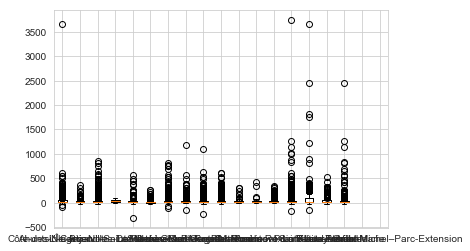

In [92]:
# Box plot to show the distribution between BOROUGHS x Number days between declaration and inspection
values = []
labels = []
for bdr in sorted(df['BORO_NAME'].unique()):
    labels.append(bdr)
    values.append(list(df[df['BORO_NAME']==bdr]['DATE_DIFF'].values))

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

## Multiple variables (Categorical x Categorical)

In [ ]:
# Count of number of houses by zipcode and bedrooms

n_bedrooms = [2,3,4]
zipcodes = df['zipcode'].unique()
r = range(len(zipcodes))

df_group = df.groupby(['zipcode', 'bedrooms'])['id'].count().reset_index()
df_group = df.pivot_table(index='zipcode', columns = 'bedrooms', values='id')
df_group = df_group[[2,3,4]]
df_group.columns = ['2BR','3BR','4BR']
df_group = df_group.sort_values(['2BR','3BR','4BR'])

raw_data = {'2BR': df_group['2BR'].values, 
            '3BR': df_group['3BR'].values, 
            '4BR': df_group['4BR'].values
           }

# From raw value to percentage
totals = [float(i+j+k) for i,j,k in zip(raw_data['2BR'], raw_data['3BR'], raw_data['4BR'])]
br2Bars = [i / j * 100 for i,j in zip(raw_data['2BR'], totals)]
br3Bars = [i / j * 100 for i,j in zip(raw_data['3BR'], totals)]
br4Bars = [i / j * 100 for i,j in zip(raw_data['4BR'], totals)]

# plot
barWidth = 0.85
names = zipcodes
plt.figure(figsize=(12,6))
# Create green Bars
plt.bar(r, br2Bars, edgecolor='white', width=barWidth, alpha=0.7, color='g', label='2BR')
# Create orange Bars
plt.bar(r, br3Bars, bottom=br2Bars, edgecolor='white', width=barWidth, alpha=0.7, color='orange', label='3BR')
# Create blue Bars
plt.bar(r, br4Bars, bottom=[i+j for i,j in zip(br2Bars, br3Bars)], edgecolor='white', width=barWidth, alpha=0.7, color='b', label='4BR')

# Limit on y-axis
plt.ylim(0,100)

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("zipcode")

plt.legend()

# Show graphic
plt.show()

## Business Perspective
"An approximate answer to the right question is worth a great deal more than a precise answer to the wrong question." John Tukey

In [ ]:
# What is the total number of sales per month?

In [ ]:
# What is the total sales ($) per month?

In [ ]:
# What is the total number of sales per day of week?

In [ ]:
# What is the average price by zip code?

In [ ]:
# Identify the zip codes with highest and lowest price per square foot

In [ ]:
# Is the grade a good indicator of price?

In [ ]:
# Is the walking score a good indicator of price?

In [ ]:
# Apply linear regression to the price

from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

columns = ['bedrooms', 'sqft_living15', 'grade', 'condition']

# Train the model using the training sets
model.fit(df[columns], df['price'])

# Print the Coefficients
print('Coefficients', np.round(model.coef_,2))
print('Interception', round(model.intercept_,2))
print('')
for i, col in enumerate(columns):
    print(col, round(model.coef_[i],1))

print('')
prediction = model.predict([[4, 3000, 10, 4]])
print('Prediction', prediction.round(1)[0])

In [ ]:
# Apply linear regression to the price considering the zipcode

from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

columns = ['bedrooms', 'sqft_living15', 'grade', 'condition']

# Train the model using the training sets
zipcode = 98000
model.fit(df[df['zipcode']==zipcode][columns], df[df['zipcode']==zipcode]['price'])

# Print the Coefficients
print('Coefficients', np.round(model.coef_,2))
print('Interception', round(model.intercept_,2))
print('')
for i, col in enumerate(columns):
    print(col, round(model.coef_[i],1))

print('')
prediction = model.predict([[4, 3000, 10, 4]])
print('Prediction', prediction.round(1)[0])